<a href="https://colab.research.google.com/github/Bilalnc8/Toronto-House-Price-Predicitor-/blob/main/Toronto_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
import datetime as dt
from datetime import date, datetime, time
from sklearn.metrics import r2_score
import regex as re
from sklearn import preprocessing
import pickle

In [ ]:
# Load the Data file and assign it to the variable data. I had a excel file, so yea

df = pd.read_excel("/content/sample_data/data (2).xlsx", index_col=0)

In [ ]:
df.head()

,title,final_price,list_price,bedrooms,bathrooms,sqft,parking,description,mls,type,full_link,full_address,lat,long,city_district
0,"1303 - 38 Grenville St, Toronto (C4461599) | Z...","855,000","$870,000",2 + 1 beds,2 baths,800–899 sq. ft.,1 parking,"Luxurious And Spacious Murano Tower. 2+1, 2 Ba...",C4461599,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"38 Grenville St, Toronto",NaN,NaN,NaN
1,"2 Cabot Crt, Toronto (W4502992) | Zoocasa","885,000","$898,000",3 beds,2 baths,N/A sq. ft.,6 parking,Fantastic Opportunity To Live Within The Histo...,W4502992,Semi-Detached,https://www.zoocasa.com/toronto-on-real-estate...,"2 Cabot Crt, Toronto",NaN,NaN,NaN
2,"1504 - 30 Roehampton Ave, Toronto (C4511330) |...","550,000","$549,900",1 beds,1 baths,500–599 sq. ft.,no parking,Bright Sunfilled Spacious 1 Bdr Unit; Floor To...,C4511330,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"30 Roehampton Ave, Toronto",NaN,NaN,NaN
3,"514 - 65 East Liberty St, Toronto (C4515763) |...","665,000","$600,000",1 + 1 beds,1 baths,600–699 sq. ft.,1 parking,Rare Loft-Like Condo In Liberty Village W/ 18'...,C4515763,Condo Apt,https://www.zoocasa.com/toronto-on-real-estate...,"65 East Liberty St, Toronto",NaN,NaN,NaN
4,"61 Twelfth St, Toronto (W4519375) | Zoocasa","825,513","$839,000",2 beds,2 baths,N/A sq. ft.,1 parking,Location! Location! Location. Your Cottage In ...,W4519375,Detached,https://www.zoocasa.com/toronto-on-real-estate...,"61 Twelfth St, Toronto",NaN,NaN,NaN


In [ ]:
# Discards based on what you put in the list
discards = ["N/A", "Sci"]
df = df[~df.sqft.str.contains('|'.join(discards), na=True)]


# Find the proper sqft, defaults to the higher number

df["final_sqft"] = df["sqft"].str.replace(r'[^0-9\–\-]+', '').apply(lambda x: re.split("[-–]", x)[-1])

# Find the proper bedroom room num, adds em up

df["bedrooms"] = df["bedrooms"].str.replace(r'[^0-9\–\-]+', '', regex=True).apply(lambda x: str(sum(int(digit) for digit in x)))
print(df["bedrooms"].unique())


# df.drop(columns=df.columns[(df == '+').any()])
# df.drop(df.loc[df['type'] == '<d'].index, inplace=True)
# df.drop(df.loc[df['bedrooms'] == '+'].index, inplace=True)
#df.drop(df.loc[df['bedrooms'].str.contains('\+').any()].index, inplace=True)


df['parking'] = df['parking'].str.replace('parking','')
df['parking'] = df['parking'].str.replace('no','0')
df['bathrooms'] = df['bathrooms'].str.replace('baths','')
df['list_price'] = df['list_price'].str.replace('$','')
df['list_price'] = df['list_price'].str.replace(',','')
df['final_price'] = df['final_price'].str.replace(',','')

#df['num_of_rooms'] = df['bedrooms'].str.split('+').str[0]
df[ df[ 'final_sqft' ].str.contains( 'N/A sq. ft.' )==False ]

df[ df['type'].str.contains('Co-Ownership Apt')==False ]

#df = df[~df['bedrooms'].isin(["+"])]


#df["type"].replace({"Condo Apt": 1, "semi-Detached":2, "Detached": 3, "Att/Row/Twnhouse": 4, 'Row': 4, 'Link':4, "Duplex": 5, 'Condo Townhouse': 4, 'Comm Element Condo':1, 'Co-Ownership Apt' && 'Co-Op Apt': 1}, regex=True, inplace=True)
label_encoder = preprocessing.LabelEncoder()

df['type']= label_encoder.fit_transform(df['type'])


print(df["type"].unique())


#df['bedrooms'] = df['bedrooms'].astype('int')
# df.dropna(inplace=True)  
#display
df.tail()



df.drop(['title', 'full_link', 'full_address','description', 'city_district', 'lat', 'long', 'sqft', 'mls'], axis=1, inplace=True)


<ipython-input-4-8003b3e660be>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df["final_sqft"] = df["sqft"].str.replace(r'[^0-9\–\-]+', '').apply(lambda x: re.split("[-–]", x)[-1])
<ipython-input-4-8003b3e660be>:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['list_price'] = df['list_price'].str.replace('$','')


['3' '1' '2' '0' '4' '6' '5' '7' '8' '11' '9' '10' '12']
[ 4  8  5  9 14  0  3  2  1 16 12  7 13 15 10 11  6]


In [ ]:

df

,final_price,list_price,bedrooms,bathrooms,parking,type,final_sqft
0,"855,000","870,000",3,2,1,4,899
2,"550,000","549,900",1,1,0,4,599
3,"665,000","600,000",2,1,1,4,699
5,"368,000","289,000",0,1,1,4,499
6,"2,700,000","2,798,000",4,5,2,8,3000
...,...,...,...,...,...,...,...
17537,"565,000","559,980",2,1,1,4,799
17538,"670,000","688,000",3,2,1,4,899
17539,"785,000","799,000",2,2,1,4,799
17540,"1,025,000","998,888",5,5,2,8,3500


In [ ]:
#setting columns for our dataset 

dataset_cols = ['final_price', 'list_price', 'bedrooms', 'bathrooms', 'parking', 'type', 'final_sqft']

df.columns = dataset_cols

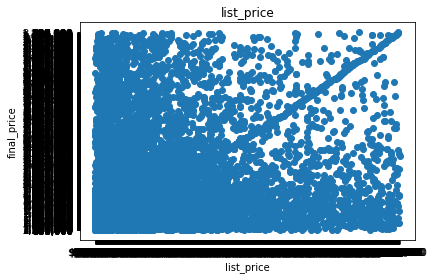

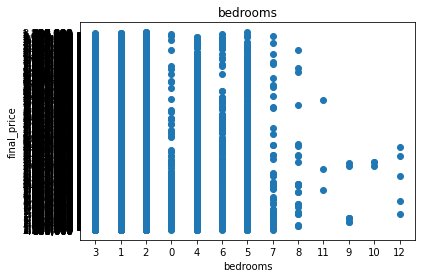

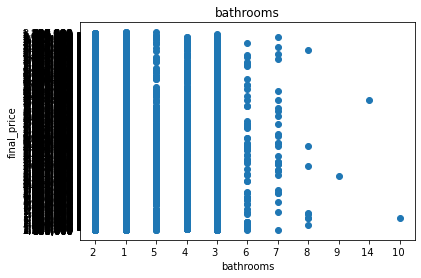

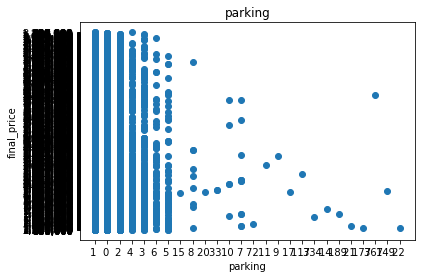

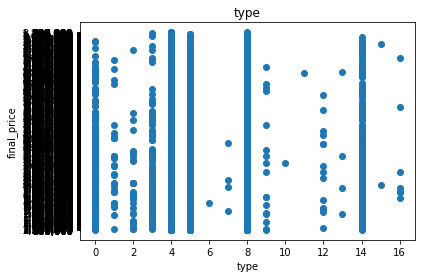

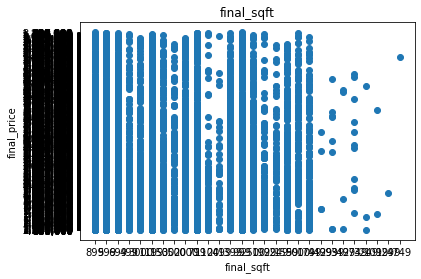

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label],df['final_price'])
  plt.title(label)
  plt.ylabel('final_price');
  plt.xlabel(label)
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Seperating x's from the y-val (dependent)
x = df.drop("final_price", axis = 1)
y = df["final_price"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)


In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
print(f"Linear Regression Score: {lr.score(x_test, y_test)}")

Linear Regression Score: 0.9837807867132305


In [ ]:
with open('trained_pipeline-0.1.0.pkl', 'wb') as f:
  pickle.dump(lr,f)

In [ ]:
price_asking;
bedrooms;
bathrooms;
parking;
typeOf;
sqft;

predictedHousePrice = lr.predict([[price_asking, bedrooms, bathrooms, parking,typeOf, sqft]])

print(predictedHousePrice)

NameError: ignored